In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore")


### 무지성 때려넣기

In [14]:
data1 = pd.read_excel("../Data/NoScale.xlsx").iloc[:, 1:]
unique = data1[["경주일자",	"경주번호"]].drop_duplicates()
unique = unique.reset_index()
data1["key"]=0
for i in range(len(unique)):
    data1.loc[(data1["경주일자"]==unique["경주일자"][i])&(data1["경주번호"]==unique["경주번호"][i]), "key"] = i
data1["착순"] = data1["착순"]-1
pd.set_option('display.max_columns', None)
data1 = data1.drop(columns=["서울,제주S1F구간통과순위(서울,제주공통)",	"서울,제주1코너구간통과순위(서울,제주공통)",	"서울,제주2코너구간통과순위(서울,제주공통)",	"서울,제주3코너구간통과순위(서울,제주공통)",	"서울,제주4코너구간통과순위(서울,제주공통)",	"서울,제주G1F구간통과순위(서울,제주공통)",	"제주S-1F통과기록",	"제주1코너통과기록",	"제주2코너통과기록",	"제주3코너통과기록",	"제주G-3F통과기록",	"제주G-1F통과기록"])
data1

,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),경주마통산출전횟수,경주마최근1년출전횟수,부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,제주4코너통과기록,마체중,체중증감,경주마통산1착승률,경주마통산2찬승률,경주마최근1년1착승률,경주마최근1년2착승률,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),avg_temp,key
0,20230624,1,800,0,1,2,-1,68.1,2,2,54.0,12,27,10781,350,442,34.4,250,11,0.500000,0.000000,0.5,0.000000,0.135450,0.120868,0.124105,0.138425,0.094704,0.102217,0.117143,0.142857,0.115385,0.115385,4,1,6.0,0,0.62,0.28,13.0,22.0,21.0,78.0,27.9,0.0,4.8,110,56,0.0,46.2,26.275,0
1,20230624,1,800,1,4,3,1,68.5,4,4,53.0,3,19,7980,381,705,34.1,311,-17,0.000000,0.250000,0.0,0.250000,0.067308,0.084615,0.076555,0.100478,0.116165,0.117293,0.102362,0.091864,0.123404,0.109220,4,1,6.0,0,0.60,NaN,18.0,NaN,30.0,NaN,27.9,0.0,4.8,110,56,0.0,46.2,26.275,0
2,20230624,1,800,2,9,2,0,68.5,2,2,55.0,6,12,4705,343,420,34.6,270,3,0.000000,0.000000,0.0,0.000000,0.151738,0.123348,0.170455,0.125000,0.158980,0.127099,0.157434,0.107872,0.195238,0.116667,4,1,6.0,0,0.83,NaN,5.0,NaN,6.0,NaN,27.9,0.0,4.8,110,56,0.0,46.2,26.275,0
3,20230624,1,800,3,3,3,0,68.6,2,2,56.0,18,13,5448,445,943,33.9,301,7,0.000000,0.500000,0.0,0.500000,0.156444,0.132137,0.158986,0.124424,0.122981,0.122430,0.141573,0.110112,0.130435,0.119830,4,1,6.0,0,0.34,0.34,22.0,10.0,65.0,29.0,27.9,0.0,4.8,110,56,0.0,46.2,26.275,0
4,20230624,1,800,4,8,3,0,69.0,9,9,55.0,13,19,7231,367,711,34.8,265,0,0.000000,0.111111,0.0,0.111111,0.093869,0.099154,0.064677,0.074627,0.099710,0.098050,0.073569,0.108992,0.078762,0.123769,4,1,6.0,0,NaN,NaN,NaN,NaN,NaN,NaN,27.9,0.0,4.8,110,56,0.0,46.2,26.275,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28678,20190111,9,900,5,8,3,1,64.1,15,0,54.5,10,19,7980,381,1561,34.9,308,5,0.133333,0.200000,0.0,0.000000,0.078571,0.089286,0.000000,0.000000,0.116165,0.117293,0.102362,0.091864,0.117873,0.122998,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.6,0.0,1.9,270,64,0.0,12.0,7.875,2867
28679,20190111,9,900,6,3,4,1,64.2,8,0,57.0,18,17,6512,432,1151,35.2,311,-2,0.000000,0.000000,0.0,0.000000,0.156444,0.132137,0.158986,0.124424,0.102273,0.107801,0.125000,0.111111,0.087750,0.125109,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.6,0.0,1.9,270,64,0.0,12.0,7.875,2867
28680,20190111,9,900,7,1,3,1,64.5,19,0,53.0,26,27,10781,350,1174,35.6,282,-4,0.105263,0.105263,0.0,0.000000,0.086402,0.105361,0.000000,0.000000,0.094704,0.102217,0.117143,0.142857,0.095400,0.088586,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.6,0.0,1.9,270,64,0.0,12.0,7.875,2867
28681,20190111,9,900,8,4,4,1,64.6,26,0,54.0,31,32,13727,360,1027,35.9,316,4,0.000000,0.076923,0.0,0.000000,0.110809,0.117121,0.094421,0.077253,0.078531,0.093028,0.091667,0.075000,0.072055,0.095424,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.6,0.0,1.9,270,64,0.0,12.0,7.875,2867


In [15]:
pd.reset_option('max_columns')

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
X_train = data1[data1["경주일자"]<20220701].drop(["경주기록(초)","착순", "key"], axis=1)
X_test = data1[data1["경주일자"]>=20220701].drop(["경주기록(초)", "착순","key"], axis=1) 
y_train = data1[data1["경주일자"]<20220701]["착순"]
y_test = data1[data1["경주일자"]>=20220701]["착순"]

params = {
    'objective':"multi:softmax", 
    'num_class':data1["착순"].nunique(),
    'max_depth':5,
    'learning_rate': 0.1,
    'n_estimators': 100
}
xgb_class = XGBClassifier(params = params)
xgb_class.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_class.predict_proba(X_test)@np.array((0,1,2,3,4,5,6,7,8,9,10,11,12))

pred_key = pd.concat([data1[data1["경주일자"]>=20220701]["key"], pd.DataFrame(y_pred)], axis=1)
pred_key.columns=["key",	"y_pred"]

true_key = pd.concat([data1[data1["경주일자"]>=20220701]["key"], pd.DataFrame(y_test)], axis=1)
true_key.columns=["key",	"y_test"]

pred_key["in5"] = 0
for i in pred_key["key"].unique():
    index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
    pred_key.loc[index,"in5"]=1

true_key["in3"] = 0
for i in true_key["key"].unique():
    index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
    true_key.loc[index,"in3"]=1

count = 0
for key in true_key["key"].unique():
    num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
    if num==3:
        count+=1

count/len(true_key["key"].unique())

/opt/homebrew/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [20:38:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)


0.3372093023255814

### 무지성 정규화

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [51]:
scaled_data = scaler.fit_transform(data1.drop(["경주기록(초)","착순", "key"], axis=1))

In [53]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
X_train = scaled_data[6939:]
X_test = scaled_data[:6939]
y_train = data1[6939:]["착순"]
y_test = data1[:6939]["착순"]

params = {
    'objective':"multi:softmax", 
    'num_class':data1["착순"].nunique(),
    'max_depth':5,
    'learning_rate': 0.1,
    'n_estimators': 100
}
xgb_class = XGBClassifier(params = params)
xgb_class.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_class.predict_proba(X_test)@np.array((0,1,2,3,4,5,6,7,8,9,10,11,12))

pred_key = pd.concat([data1[data1["경주일자"]>=20220701]["key"], pd.DataFrame(y_pred)], axis=1)
pred_key.columns=["key",	"y_pred"]

true_key = pd.concat([data1[data1["경주일자"]>=20220701]["key"], pd.DataFrame(y_test)], axis=1)
true_key.columns=["key",	"y_test"]

pred_key["in5"] = 0
for i in pred_key["key"].unique():
    index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
    pred_key.loc[index,"in5"]=1

true_key["in3"] = 0
for i in true_key["key"].unique():
    index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
    true_key.loc[index,"in3"]=1

count = 0
for key in true_key["key"].unique():
    num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
    if num==3:
        count+=1

count/len(true_key["key"].unique())

/opt/homebrew/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:18:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)


0.34011627906976744

In [16]:
data1["경주거리"].unique()

array([ 800, 1000, 1110, 1400,  900, 1200, 1700, 1800, 1610])

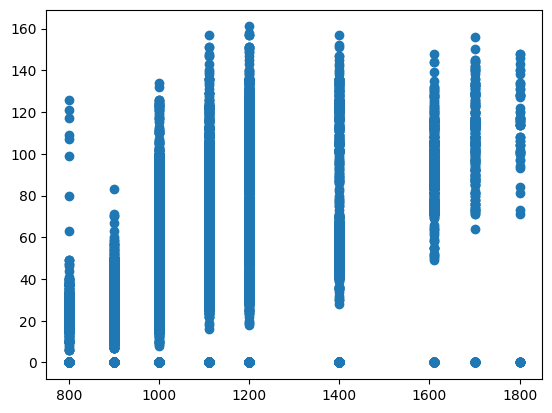

In [19]:
plt.scatter(data1["경주거리"], data1["레이팅"])

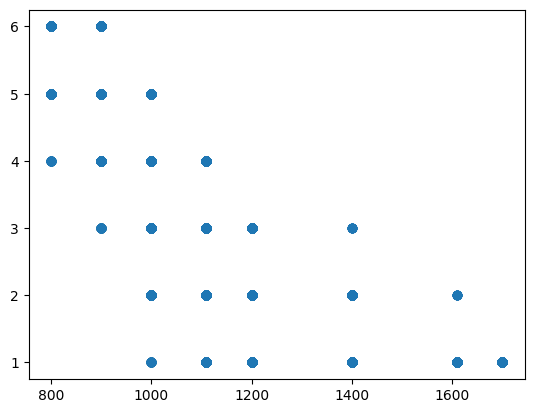

In [20]:
plt.scatter(data1["경주거리"], data1["등급"])

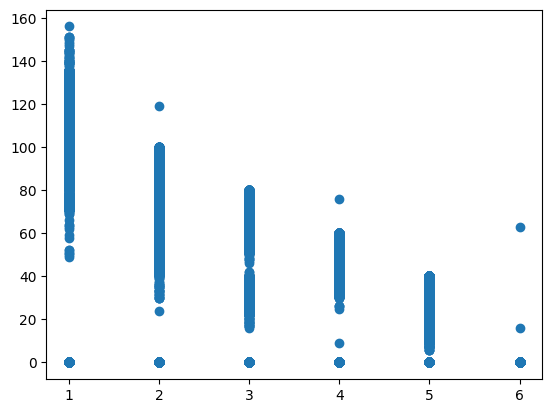

In [21]:
plt.scatter(data1["등급"], data1["레이팅"])

### Clustering Regression

In [232]:
data_1200=data1[data1['경주거리']==1200].reset_index(drop=True)
data_800=data1[data1['경주거리']==800].reset_index(drop=True)
data_900=data1[data1['경주거리']==900].reset_index(drop=True)
data_1000=data1[data1['경주거리']==1000].reset_index(drop=True)
data_1110=data1[data1['경주거리']==1110].reset_index(drop=True)
data_1400=data1[data1['경주거리']==1400].reset_index(drop=True)
data_1610=data1[data1['경주거리']==1610].reset_index(drop=True)
data_1700=data1[data1['경주거리']==1700].reset_index(drop=True)
data_1800=data1[data1['경주거리']==1800].reset_index(drop=True)
data_list = [data_1000, data_1110, data_1200, data_1400, data_1610, data_1700, data_800, data_900]

#### 등급 imputation

In [270]:
for data in data_list:
    # 등급이 없는 경기 확인
    mis_grade_key = data[data["등급"].isna()]["key"].unique()
    rest_data = data[~data["key"].isin(mis_grade_key)]
    mean_data = rest_data.groupby("key").mean()["경주기록(초)"]
    for key in mis_grade_key:
        # print(mean_data)
        mean = data[data["key"]==key]["경주기록(초)"].mean()
        impute_key = np.abs(mean_data-mean).idxmin()
        impute_value = data[data["key"]==impute_key]["등급"].mean()
        data.loc[data["key"]==key,"등급"] = impute_value

In [271]:
k=2
model=KMeans(n_clusters=k,random_state=42)
data_1000["cluster"]=model.fit_predict(data_1000[["경주기록(초)"]])

(array([2.600e+01, 5.700e+01, 1.020e+02, 2.990e+02, 5.610e+02, 9.060e+02,
        1.225e+03, 1.409e+03, 1.207e+03, 7.770e+02, 4.480e+02, 2.290e+02,
        1.220e+02, 4.200e+01, 3.400e+01, 1.700e+01, 8.000e+00, 4.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 78.8 ,  79.79,  80.78,  81.77,  82.76,  83.75,  84.74,  85.73,
         86.72,  87.71,  88.7 ,  89.69,  90.68,  91.67,  92.66,  93.65,
         94.64,  95.63,  96.62,  97.61,  98.6 ,  99.59, 100.58, 101.57,
        102.56, 103.55, 104.54, 105.53, 106.52, 107.51, 108.5 ]),
 <BarContainer object of 30 artists>)

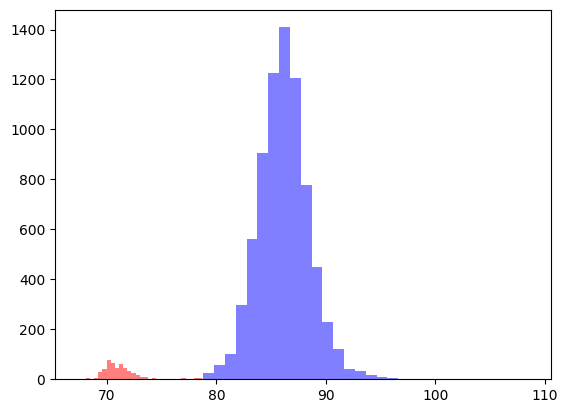

In [272]:
plt.hist(data_1000[data_1000['cluster']==0]['경주기록(초)'], bins=30, alpha=0.5, color="r")
plt.hist(data_1000[data_1000['cluster']==1]['경주기록(초)'], bins =30, alpha=0.5, color="b")

#### 먼저 cluster 예측

In [241]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
X_train = data_1000[data_1000["경주일자"]<20220701].drop(["경주기록(초)","cluster","착순"], axis=1)
X_test = data_1000[data_1000["경주일자"]>=20220701].drop(["경주기록(초)","cluster", "착순"], axis=1) 
y_train = data_1000[data_1000["경주일자"]<20220701]["cluster"]
y_test = data_1000[data_1000["경주일자"]>=20220701]["cluster"]

params = { 
    'num_class':2,
    'max_depth':5,
    'learning_rate': 0.1,
    'n_estimators': 100
}
xgb_class = XGBClassifier(params = params)
xgb_class.fit(X_train, y_train)
y_pred = xgb_class.predict(X_test)

accuracy_score(y_pred, y_test)

0.9992116673236106

#### cluster 변수 넣어서 모델 학습(classification)

In [254]:
data_1000["cluster_pred"]=np.hstack([y_train,y_pred])

In [268]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
# X_train = drop_data[data["경주일자"]<20220701].drop(["경주기록(초)","착순", "key"], axis=1)
# X_test = drop_data[data["경주일자"]>=20220701].drop(["경주기록(초)", "착순","key"], axis=1) 
# y_train = drop_data[data["경주일자"]<20220701]["경주기록(초)"]
# y_test = drop_data[data["경주일자"]>=20220701]["경주기록(초)"]

X_train = data_1000[data_1000["경주일자"]<20220701].drop(["경주기록(초)","cluster","착순"], axis=1)
X_test = data_1000[data_1000["경주일자"]>=20220701].drop(["경주기록(초)","cluster", "착순"], axis=1) 
y_train = data_1000[data_1000["경주일자"]<20220701]["경주기록(초)"]
y_test = data_1000[data_1000["경주일자"]>=20220701]["경주기록(초)"]

params = {
    'max_depth':5,
    'reg_lambda':1,
    'learning_rate': 0.1,
    'n_estimators': 100
}
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_reg.predict(X_test)

pred_key = pd.concat([X_test["key"], pd.DataFrame(y_pred)], axis=1)
pred_key.columns=["key",	"y_pred"]

true_key = pd.concat([X_test["key"], pd.DataFrame(y_test)], axis=1)
true_key.columns=["key",	"y_test"]

pred_key["in5"] = 0
for i in pred_key["key"].unique():
    index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
    pred_key.loc[index,"in5"]=1

true_key["in3"] = 0
for i in true_key["key"].unique():
    index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
    true_key.loc[index,"in3"]=1

count = 0
for key in true_key["key"].unique():
    num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
    if num==3:
        count+=1

count/len(true_key["key"].unique())

0.22267206477732793

#### cluster 변수 넣어서 모델 학습(regression)

In [266]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
X_train = data_1000[data_1000["경주일자"]<20220701].drop(["경주기록(초)","착순","cluster","cluster_pred", "key"], axis=1)
X_test = data_1000[data_1000["경주일자"]>=20220701].drop(["경주기록(초)", "착순","cluster","cluster_pred","key"], axis=1) 
y_train = data_1000[data_1000["경주일자"]<20220701]["착순"]
y_test = data_1000[data_1000["경주일자"]>=20220701]["착순"]

params = {
    'objective':"multi:softmax", 
    'num_class':data_1000["착순"].nunique(),
    'max_depth':5,
    'learning_rate': 0.1,
    'n_estimators': 100
}
xgb_class = XGBClassifier(params = params)
xgb_class.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_class.predict_proba(X_test)@np.array((0,1,2,3,4,5,6,7,8,9,10,11))

pred_key = pd.concat([data_1000[data_1000["경주일자"]>=20220701]["key"], pd.DataFrame(y_pred)], axis=1)
pred_key.columns=["key",	"y_pred"]

true_key = pd.concat([data_1000[data_1000["경주일자"]>=20220701]["key"], pd.DataFrame(y_test)], axis=1)
true_key.columns=["key",	"y_test"]

pred_key["in5"] = 0
for i in pred_key["key"].unique():
    index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
    pred_key.loc[index,"in5"]=1

true_key["in3"] = 0
for i in true_key["key"].unique():
    index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
    true_key.loc[index,"in3"]=1

count = 0
for key in true_key["key"].unique():
    num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
    if num==3:
        count+=1

count/len(true_key["key"].unique())

0.2388663967611336

array([69.98597 , 69.86231 , 71.46983 , ..., 94.60729 , 95.64939 ,
       96.543884], dtype=float32)

In [50]:
# data=pd.read_excel('../Jaehoon/fifinal_merge_data.xlsx')
# data

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,제주4코너통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2,"(20,)","(50,)","(70,)","(90,)","(110,)","(140,)","(160,)","(180,)","(200,)","(230,)","(250,)","(270,)","(290,)","(320,)","(340,)","(360,)","(800,)","(900,)","(1000,)","(1110,)","(1200,)","(1400,)","(1610,)","(1700,)","(1800,)"
0,0,20230624,1,800,1,1,-1.671258,-1,68.1,-0.256074,-0.457800,1.037848,0.993131,-0.754877,-1.293341,-0.230165,-1.283846,1.607346,0.632445,0.821772,0.477099,1.483899,-0.949783,-0.910064,0.308688,2.093905,-0.077733,0.152808,4,1,0.0,0,0.62,0.28,13.0,22.0,21.0,78.0,0.278107,0.527273,0.527273,27.9,0.0,3,110,56,0.0,46.2,26.275,2.897647,-0.679572,2.897647,-0.679572,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,20230624,1,800,2,4,0.185695,1,68.5,-0.896258,-1.635000,0.115316,0.219819,-0.009616,0.220449,-0.997380,1.716714,-2.447220,-1.813527,-1.550703,-0.553510,0.046051,0.119013,0.683781,-0.090172,-0.556122,0.120039,-0.574808,4,1,0.0,0,0.60,NaN,18.0,NaN,30.0,NaN,0.000000,0.534247,0.534247,27.9,0.0,3,110,56,0.0,46.2,26.275,-0.446589,1.222662,-0.446589,1.222662,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2,20230624,1,800,3,9,-1.671258,0,68.5,0.384111,-1.242600,-0.691898,-0.684358,-0.923162,-1.419970,0.281312,-0.300056,0.448898,1.217072,0.984041,1.481690,0.975211,2.251169,1.720409,1.395968,0.275789,1.891531,0.304127,4,1,0.0,0,0.83,NaN,5.0,NaN,6.0,NaN,0.000000,0.520000,0.520000,27.9,0.0,3,110,56,0.0,46.2,26.275,-0.128091,-0.679572,-0.128091,-0.679572,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3,20230624,1,800,4,3,0.185695,0,68.6,1.024295,0.327000,-0.576582,-0.479228,1.528988,1.590344,-1.508858,1.224819,1.028122,1.385996,1.559213,1.233122,0.953384,0.458424,1.226856,0.967944,0.392230,0.293418,0.677529,4,1,0.0,0,0.34,0.34,22.0,10.0,65.0,29.0,0.323944,0.328671,0.328671,27.9,0.0,3,110,56,0.0,46.2,26.275,-0.128091,2.100616,-0.128091,2.100616,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,20230624,1,800,5,8,0.185695,0,69.0,0.384111,-0.327000,0.115316,0.013031,-0.346186,0.254985,0.792790,-0.546004,0.014481,-0.860116,-0.599244,-0.810965,-0.933508,-0.700488,-1.350570,-0.867153,0.333998,-0.980875,1.142443,4,1,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.333456,27.9,0.0,3,110,56,0.0,46.2,26.275,-0.858441,0.087377,-0.858441,0.087377,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28678,28678,20190111,9,900,6,8,-0.654654,1,64.1,0.098853,-1.086500,-0.459964,-0.407759,-0.167838,1.661219,-1.398589,0.381471,0.302063,-0.998704,-1.118542,-0.882692,-1.094640,1.073361,1.406952,0.289028,-0.396696,1.803004,1.318934,8,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.002883,7.6,0.0,2,270,64,0.0,12.0,7.875,0.253474,1.609586,0.333333,0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
28679,28679,20190111,9,900,7,3,1.527525,1,64.2,1.746409,0.072433,-0.730531,-0.841425,0.876034,0.190796,-0.662489,0.641565,-0.285281,2.442343,2.050307,2.251228,1.785575,0.176693,0.304561,0.961301,0.557588,0.038423,1.444387,8,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.002883,7.6,0.0,2,270,64,0.0,12.0,7.875,-0.691631,-1.451202,0.333333,0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
28680,28680,20190111,9,900,8,1,-0.654654,1,64.5,-0.889680,1.231367,0.622304,0.419693,-0.802349,0.273283,0.318976,-1.87

In [118]:
drop_data1=data1.drop(columns=['Unnamed: 0',"경주일자","경주번호"])
drop_data1=drop_data1.drop(columns=['제주4코너통과기록','조교사경력(년)','기수최근1년간1착승률','기수최근1년간2착승률','조교사최근1년간1착승률','조교사최근1년간2착승률','조교사위탁경주마1위승률','조교사위탁경주마2위승률'])
drop_data1=drop_data1.drop(columns=['조교사위탁경주마출전횟수','조교사최근1년간출전횟수'])
drop_data1['기수통산승률']=drop_data1['기수통산1착승률']+drop_data1['기수통산2착승률']
drop_data1['조교사통산승률']=drop_data1['조교사통산1착승률']+drop_data1['조교사통산2착승률']
drop_data1=drop_data1.drop(columns=['기수통산1착승률','기수통산2착승률','조교사통산1착승률','조교사통산2착승률'])
drop_data1=drop_data1.drop(columns=['3시간신적설(cm)'])
drop_data1=drop_data1.drop(columns=['mom_total_in3','dad_total_in3','mom_total','dad_total','mom_rating','dad_rating'])
drop_data1 = drop_data1.drop(columns=["서울,제주S1F구간통과순위(서울,제주공통)",	"서울,제주1코너구간통과순위(서울,제주공통)",	"서울,제주2코너구간통과순위(서울,제주공통)",	"서울,제주3코너구간통과순위(서울,제주공통)",	"서울,제주4코너구간통과순위(서울,제주공통)",	"서울,제주G1F구간통과순위(서울,제주공통)",	"제주S-1F통과기록",	"제주1코너통과기록",	"제주2코너통과기록",	"제주3코너통과기록",	"제주G-3F통과기록",	"제주G-1F통과기록"])
drop_data1

,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),경주마통산출전횟수,경주마최근1년출전횟수,부담중량,기수경력(년),조교사통산출전횟수,마체중,체중증감,경주마통산1착승률,경주마통산2찬승률,경주마최근1년1착승률,경주마최근1년2착승률,주로상태_함수율,혈통,등급,레이팅,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),지면온도(°C),avg_temp,key,기수통산승률,조교사통산승률
0,800,0,1,2,-1,68.1,2,2,54.0,12,10781,250,11,0.500000,0.000000,0.5,0.000000,4,1,6.0,0,27.9,0.0,4.8,110,56,46.2,26.275,0,0.256319,0.196921
1,800,1,4,3,1,68.5,4,4,53.0,3,7980,311,-17,0.000000,0.250000,0.0,0.250000,4,1,6.0,0,27.9,0.0,4.8,110,56,46.2,26.275,0,0.151923,0.233459
2,800,2,9,2,0,68.5,2,2,55.0,6,4705,270,3,0.000000,0.000000,0.0,0.000000,4,1,6.0,0,27.9,0.0,4.8,110,56,46.2,26.275,0,0.275086,0.286079
3,800,3,3,3,0,68.6,2,2,56.0,18,5448,301,7,0.000000,0.500000,0.0,0.500000,4,1,6.0,0,27.9,0.0,4.8,110,56,46.2,26.275,0,0.288581,0.245411
4,800,4,8,3,0,69.0,9,9,55.0,13,7231,265,0,0.000000,0.111111,0.0,0.111111,4,1,6.0,0,27.9,0.0,4.8,110,56,46.2,26.275,0,0.193023,0.197760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28678,900,5,8,3,1,64.1,15,0,54.5,10,7980,308,5,0.133333,0.200000,0.0,0.000000,8,0,4.0,0,7.6,0.0,1.9,270,64,12.0,7.875,2867,0.167857,0.233459
28679,900,6,3,4,1,64.2,8,0,57.0,18,6512,311,-2,0.000000,0.000000,0.0,0.000000,8,0,4.0,0,7.6,0.0,1.9,270,64,12.0,7.875,2867,0.288581,0.210074
28680,900,7,1,3,1,64.5,19,0,53.0,26,10781,282,-4,0.105263,0.105263,0.0,0.000000,8,0,4.0,0,7.6,0.0,1.9,270,64,12.0,7.875,2867,0.191764,0.196921
28681,900,8,4,4,1,64.6,26,0,54.0,31,13727,316,4,0.000000,0.076923,0.0,0.000000,8,0,4.0,0,7.6,0.0,1.9,270,64,12.0,7.875,2867,0.227930,0.171560


In [51]:
data=data.drop(columns=['Unnamed: 0'])
data=data.drop(columns=['제주4코너통과기록','조교사경력(년)','기수최근1년간1착승률','기수최근1년간2착승률','조교사최근1년간1착승률','조교사최근1년간2착승률','조교사위탁경주마1위승률','조교사위탁경주마2위승률'])
data=data.drop(columns=['조교사위탁경주마출전횟수','조교사최근1년간출전횟수'])
data['기수통산승률']=data['기수통산1착승률']+data['기수통산2착승률']
data['조교사통산승률']=data['조교사통산1착승률']+data['조교사통산2착승률']
data=data.drop(columns=['기수통산1착승률','기수통산2착승률','조교사통산1착승률','조교사통산2착승률'])
data=data.drop(columns=['3시간신적설(cm)'])
data=data.drop(columns=['mom_total_in3','dad_total_in3','mom_total','dad_total','dad_post','mom_post','mom_rating','dad_rating'])

In [53]:
pd.set_option('display.max_columns', None)


a=data.corr()
#a['조교사1착승률'].sort_values(ascending=False)
#조교사통산출전횟수는 조교사경력(년)과 상관관계성 높음
#조교사통산1착승률은 2착승률과 상관관계성 높음
#기수통산1착승률은 2착승률과 높음 (최근 통산 둘 중 하나 선택)
#a['max_post'].sort_values(ascending=False)
data[data['레이팅']==0]['레이팅']=29

/var/folders/g1/qj9m500d7pd6vxgjq5shcf8h0000gn/T/ipykernel_9653/978140445.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data['레이팅']==0]['레이팅']=29


In [54]:
data

,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사통산출전횟수,마체중,체중증감,주로상태_함수율,혈통,등급,레이팅,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),지면온도(°C),avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2,"(20,)","(50,)","(70,)","(90,)","(110,)","(140,)","(160,)","(180,)","(200,)","(230,)","(250,)","(270,)","(290,)","(320,)","(340,)","(360,)","(800,)","(900,)","(1000,)","(1110,)","(1200,)","(1400,)","(1610,)","(1700,)","(1800,)"
0,20230624,1,800,1,1,-1.671258,-1,68.1,-0.256074,-0.457800,0.993131,-1.283846,1.607346,4,1,0.0,0,0.527273,27.9,0.0,3,110,56,46.2,26.275,2.897647,-0.679572,2.897647,-0.679572,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,20230624,1,800,2,4,0.185695,1,68.5,-0.896258,-1.635000,0.219819,1.716714,-2.447220,4,1,0.0,0,0.534247,27.9,0.0,3,110,56,46.2,26.275,-0.446589,1.222662,-0.446589,1.222662,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,20230624,1,800,3,9,-1.671258,0,68.5,0.384111,-1.242600,-0.684358,-0.300056,0.448898,4,1,0.0,0,0.520000,27.9,0.0,3,110,56,46.2,26.275,-0.128091,-0.679572,-0.128091,-0.679572,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,20230624,1,800,4,3,0.185695,0,68.6,1.024295,0.327000,-0.479228,1.224819,1.028122,4,1,0.0,0,0.328671,27.9,0.0,3,110,56,46.2,26.275,-0.128091,2.100616,-0.128091,2.100616,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,20230624,1,800,5,8,0.185695,0,69.0,0.384111,-0.327000,0.013031,-0.546004,0.014481,4,1,0.0,0,0.333456,27.9,0.0,3,110,56,46.2,26.275,-0.858441,0.087377,-0.858441,0.087377,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28678,20190111,9,900,6,8,-0.654654,1,64.1,0.098853,-1.086500,-0.407759,0.381471,0.302063,8,0,0.0,0,0.002883,7.6,0.0,2,270,64,12.0,7.875,0.253474,1.609586,0.333333,0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
28679,20190111,9,900,7,3,1.527525,1,64.2,1.746409,0.072433,-0.841425,0.641565,-0.285281,8,0,0.0,0,0.002883,7.6,0.0,2,270,64,12.0,7.875,-0.691631,-1.451202,0.333333,0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
28680,20190111,9,900,8,1,-0.654654,1,64.5,-0.889680,1.231367,0.419693,-1.872676,-0.453094,8,0,0.0,0,0.002883,7.6,0.0,2,270,64,12.0,7.875,0.031869,0.036986,0.333333,0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
28681,20190111,9,900,9,4,1.527525,1,64.6,-0.230658,1.955700,1.289980,1.075055,0.218156,8,0,0.0,0,0.002883,7.6,0.0,2,270,64,12.0,7.875,-0.927190,-0.482149,0.333333,0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [55]:
data=data.drop(columns=['경주거리'])

In [56]:
pd.set_option('display.max_rows',20)

In [57]:
unique = data[["경주일자",	"경주번호"]].drop_duplicates()
unique = unique.reset_index()
unique

,index,경주일자,경주번호
0,0,20230624,1
1,10,20230624,2
2,20,20230624,3
3,30,20230624,4
4,40,20230624,5
...,...,...,...
2863,28634,20190111,5
2864,28643,20190111,6
2865,28653,20190111,7
2866,28663,20190111,8


In [58]:
data["key"]=0
for i in range(len(unique)):
    data.loc[(data["경주일자"]==unique["경주일자"][i])&(data["경주번호"]==unique["경주번호"][i]), "key"] = i
data

,경주일자,경주번호,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사통산출전횟수,마체중,체중증감,주로상태_함수율,혈통,등급,레이팅,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),지면온도(°C),avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2,"(20,)","(50,)","(70,)","(90,)","(110,)","(140,)","(160,)","(180,)","(200,)","(230,)","(250,)","(270,)","(290,)","(320,)","(340,)","(360,)","(800,)","(900,)","(1000,)","(1110,)","(1200,)","(1400,)","(1610,)","(1700,)","(1800,)",key
0,20230624,1,1,1,-1.671258,-1,68.1,-0.256074,-0.457800,0.993131,-1.283846,1.607346,4,1,0.0,0,0.527273,27.9,0.0,3,110,56,46.2,26.275,2.897647,-0.679572,2.897647,-0.679572,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20230624,1,2,4,0.185695,1,68.5,-0.896258,-1.635000,0.219819,1.716714,-2.447220,4,1,0.0,0,0.534247,27.9,0.0,3,110,56,46.2,26.275,-0.446589,1.222662,-0.446589,1.222662,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,20230624,1,3,9,-1.671258,0,68.5,0.384111,-1.242600,-0.684358,-0.300056,0.448898,4,1,0.0,0,0.520000,27.9,0.0,3,110,56,46.2,26.275,-0.128091,-0.679572,-0.128091,-0.679572,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,20230624,1,4,3,0.185695,0,68.6,1.024295,0.327000,-0.479228,1.224819,1.028122,4,1,0.0,0,0.328671,27.9,0.0,3,110,56,46.2,26.275,-0.128091,2.100616,-0.128091,2.100616,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,20230624,1,5,8,0.185695,0,69.0,0.384111,-0.327000,0.013031,-0.546004,0.014481,4,1,0.0,0,0.333456,27.9,0.0,3,110,56,46.2,26.275,-0.858441,0.087377,-0.858441,0.087377,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28678,20190111,9,6,8,-0.654654,1,64.1,0.098853,-1.086500,-0.407759,0.381471,0.302063,8,0,0.0,0,0.002883,7.6,0.0,2,270,64,12.0,7.875,0.253474,1.609586,0.333333,0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2867
28679,20190111,9,7,3,1.527525,1,64.2,1.746409,0.072433,-0.841425,0.641565,-0.285281,8,0,0.0,0,0.002883,7.6,0.0,2,270,64,12.0,7.875,-0.691631,-1.451202,0.333333,0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2867
28680,20190111,9,8,1,-0.654654,1,64.5,-0.889680,1.231367,0.419693,-1.872676,-0.453094,8,0,0.0,0,0.002883,7.6,0.0,2,270,64,12.0,7.875,0.031869,0.036986,0.333333,0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2867
28681,20190111,9,9,4,1.527525,1,64.6,-0.230658,1.955700,1.289980,1.075055,0.218156,8,0,0.0,0,0.002883,7.6,0.0,2,270,64,12.0,7.875,-0.927190,-0.482149,0.333333,0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2867


In [119]:
data["착순"] = data["착순"]-1
drop_data=drop_data1

In [60]:
# drop_data["3등이내"] = drop_data["착순"]
# drop_data["5등이내"] = drop_data["착순"]
# drop_data.loc[drop_data["착순"]>3,"3등이내"]=0
# drop_data.loc[drop_data["착순"]>5,"5등이내"]=0

In [133]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
X_train = drop_data[data["경주일자"]<20220701].drop(["경주기록(초)","착순", "key"], axis=1)
X_test = drop_data[data["경주일자"]>=20220701].drop(["경주기록(초)", "착순","key"], axis=1) 
y_train = drop_data[data["경주일자"]<20220701]["착순"]
y_test = drop_data[data["경주일자"]>=20220701]["착순"]

params = {
    'objective':"multi:softmax", 
    'num_class':drop_data["착순"].nunique(),
    'max_depth':5,
    'learning_rate': 0.1,
    'n_estimators': 100
}
xgb_reg = XGBClassifier(params = params)
xgb_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_reg.predict_proba(X_test)@np.array((0,1,2,3,4,5,6,7,8,9,10,11,12))

pred_key = pd.concat([drop_data[data["경주일자"]>=20220701]["key"], pd.DataFrame(y_pred)], axis=1)
pred_key.columns=["key",	"y_pred"]

true_key = pd.concat([drop_data[data["경주일자"]>=20220701]["key"], pd.DataFrame(y_test)], axis=1)
true_key.columns=["key",	"y_test"]

pred_key["in5"] = 0
for i in pred_key["key"].unique():
    index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
    pred_key.loc[index,"in5"]=1

true_key["in3"] = 0
for i in true_key["key"].unique():
    index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
    true_key.loc[index,"in3"]=1

count = 0
for key in true_key["key"].unique():
    num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
    if num==3:
        count+=1

count/len(true_key["key"].unique())

/opt/homebrew/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [23:21:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)


0.29941860465116277

In [134]:
X_train

,경주거리,출주번호,마필연령,마필성별,경주마통산출전횟수,경주마최근1년출전횟수,부담중량,기수경력(년),조교사통산출전횟수,마체중,체중증감,경주마통산1착승률,경주마통산2찬승률,경주마최근1년1착승률,경주마최근1년2착승률,주로상태_함수율,혈통,등급,레이팅,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),지면온도(°C),avg_temp,기수통산승률,조교사통산승률
6939,800,5,3,1,10,6,56.0,13,12632,264,-1,0.100000,0.200000,0.000000,0.000000,10,1,6.0,0,31.2,0.0,3.7,140,62,35.0,27.425,0.163769,0.183265
6940,800,4,3,-1,9,5,55.0,24,2366,248,-5,0.000000,0.222222,0.000000,0.200000,10,1,6.0,0,31.2,0.0,3.7,140,62,35.0,27.425,0.264384,0.250634
6941,800,7,3,-1,14,10,55.0,18,1268,268,-7,0.071429,0.000000,0.100000,0.000000,10,1,6.0,0,31.2,0.0,3.7,140,62,35.0,27.425,0.288581,0.231073
6942,800,10,3,1,15,13,54.0,6,4705,293,-9,0.200000,0.066667,0.230769,0.076923,10,1,6.0,0,31.2,0.0,3.7,140,62,35.0,27.425,0.275086,0.286079
6943,800,8,4,0,14,4,56.0,10,12632,263,-6,0.000000,0.000000,0.000000,0.000000,10,1,6.0,0,31.2,0.0,3.7,140,62,35.0,27.425,0.242391,0.183265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28678,900,8,3,1,15,0,54.5,10,7980,308,5,0.133333,0.200000,0.000000,0.000000,8,0,4.0,0,7.6,0.0,1.9,270,64,12.0,7.875,0.167857,0.233459
28679,900,3,4,1,8,0,57.0,18,6512,311,-2,0.000000,0.000000,0.000000,0.000000,8,0,4.0,0,7.6,0.0,1.9,270,64,12.0,7.875,0.288581,0.210074
28680,900,1,3,1,19,0,53.0,26,10781,282,-4,0.105263,0.105263,0.000000,0.000000,8,0,4.0,0,7.6,0.0,1.9,270,64,12.0,7.875,0.191764,0.196921
28681,900,4,4,1,26,0,54.0,31,13727,316,4,0.000000,0.076923,0.000000,0.000000,8,0,4.0,0,7.6,0.0,1.9,270,64,12.0,7.875,0.227930,0.171560


In [124]:
train = pd.read_excel("../Data/train_cali_1200.xlsx")
test = pd.read_excel("../Data/test_cali_1200.xlsx")

In [125]:
train

,Unnamed: 0,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,마체중,체중증감,기수최근1년간1착승률,기수최근1년간2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,주로상태_함수율,혈통,등급,레이팅,max_post,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2,기수통산승률,조교사통산승률,key,adj_record
0,7276,20220611,7,1200,1,8,0.000000,1,93.5,0.000000,0.148148,0.640000,0.812016,1.000000,-0.093431,0.715970,0.720660,0.831625,0.872643,3,1,NaN,1.000000,0.309091,1.000000,0.000000,1.000000,0.060729,1.272740,1.370961,0,93.649490
1,7277,20220611,7,1200,2,1,0.000000,0,94.4,1.000000,0.666667,0.640000,0.812016,0.400000,0.685162,0.452887,0.217828,0.831625,0.872643,3,1,NaN,0.961783,0.000000,0.304388,1.000000,0.073278,0.107692,1.661058,1.370961,0,94.550929
2,7278,20220611,7,1200,3,4,0.000000,-1,94.9,1.000000,1.000000,1.000000,1.000000,0.563636,-1.494899,0.000000,1.000000,0.000000,0.000000,3,1,NaN,0.878981,0.317647,0.249433,0.392732,0.314050,0.692308,1.660075,0.000000,0,95.051728
3,7279,20220611,7,1200,4,2,0.166667,0,96.0,1.000000,0.037037,0.480000,0.557498,0.636364,-0.560587,0.573761,0.410215,0.537692,0.413083,3,1,NaN,0.000000,0.000000,0.179733,0.483551,0.343128,1.000000,0.216522,1.167405,0,96.153487
4,7280,20220611,7,1200,5,10,0.500000,0,96.0,1.000000,0.259259,0.320000,0.342999,0.000000,-1.183462,0.268441,0.000000,0.558043,1.000000,3,1,NaN,0.000000,0.000000,0.086170,0.304006,0.218469,0.030100,0.429796,1.167640,0,96.153487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,28638,20190111,5,1200,5,4,0.500000,1,89.1,0.750000,0.560000,0.000000,0.000000,0.478261,-1.388585,0.000000,0.000000,0.816536,0.995512,2,0,0.0,0.921053,0.000000,0.013777,0.013777,1.000000,0.323864,1.289863,1.115738,167,95.316941
1490,28639,20190111,5,1200,6,5,1.000000,1,89.3,0.416667,0.560000,0.518519,0.453475,0.304348,0.131353,0.000000,0.000000,0.262419,1.000000,2,0,0.0,0.815789,0.000000,0.057035,0.269818,1.000000,0.323864,1.385797,0.410644,167,95.530896
1491,28640,20190111,5,1200,7,3,1.000000,1,89.4,1.000000,0.720000,0.259259,0.240956,0.108696,-0.206411,0.574554,0.625166,1.000000,0.974293,2,0,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.323864,1.695715,2.000000,167,95.637874
1492,28641,20190111,5,1200,8,6,0.500000,-1,89.4,0.500000,0.240000,0.814815,0.699983,0.413043,-0.037529,0.780603,1.000000,0.930506,0.786480,2,0,0.0,0.842105,0.000000,0.241447,0.241447,1.000000,0.323864,1.564005,1.753267,167,95.637874


In [130]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
# X_train = drop_data[data["경주일자"]<20220701].drop(["경주기록(초)","착순", "key"], axis=1)
# X_test = drop_data[data["경주일자"]>=20220701].drop(["경주기록(초)", "착순","key"], axis=1) 
# y_train = drop_data[data["경주일자"]<20220701]["경주기록(초)"]
# y_test = drop_data[data["경주일자"]>=20220701]["경주기록(초)"]

X_train = train.drop(["Unnamed: 0", "착순", "경주거리", "경주번호", "경주일자", "key"], axis=1)
X_test = test.drop(["Unnamed: 0", "착순", "경주거리", "경주번호", "경주일자", "key"], axis=1)
y_train = train["adj_record"]
y_test = train["adj_record"]

params = {
    'max_depth':5,
    'reg_lambda':1,
    'learning_rate': 0.1,
    'n_estimators': 100
}
xgb_reg = XGBRegressor(params = best_params)
xgb_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_reg.predict(X_test)

pred_key = pd.concat([test["key"], pd.DataFrame(y_pred)], axis=1)
pred_key.columns=["key",	"y_pred"]

true_key = pd.concat([test["key"], pd.DataFrame(y_test)], axis=1)
true_key.columns=["key",	"y_test"]

pred_key["in5"] = 0
for i in pred_key["key"].unique():
    index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
    pred_key.loc[index,"in5"]=1

true_key["in3"] = 0
for i in true_key["key"].unique():
    index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
    true_key.loc[index,"in3"]=1

count = 0
for key in true_key["key"].unique():
    num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
    if num==3:
        count+=1

count/len(true_key["key"].unique())

/opt/homebrew/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [22:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)


0.22413793103448276

In [259]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
X_train = data_1000[data_1000["경주일자"]<20220701].drop(["경주기록(초)","cluster","착순", "key"], axis=1)
X_test = data_1000[data_1000["경주일자"]>=20220701].drop(["경주기록(초)", "cluster","착순","key"], axis=1) 
y_train = data_1000[data_1000["경주일자"]<20220701]["착순"]
y_test = data_1000[data_1000["경주일자"]>=20220701]["착순"]

params = {
    'objective':"multi:softmax", 
    'num_class':data_1000["착순"].nunique(),
    'max_depth':5,
    'learning_rate': 0.1,
    'n_estimators': 100
}
xgb_class = XGBClassifier(params = params)
xgb_class.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_class.predict_proba(X_test)@np.array((0,1,2,3,4,5,6,7,8,9,10,11))

pred_key = pd.concat([data_1000[data_1000["경주일자"]>=20220701]["key"], pd.DataFrame(y_pred)], axis=1)
pred_key.columns=["key",	"y_pred"]

true_key = pd.concat([data_1000[data_1000["경주일자"]>=20220701]["key"], pd.DataFrame(y_test)], axis=1)
true_key.columns=["key",	"y_test"]

pred_key["in5"] = 0
for i in pred_key["key"].unique():
    index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
    pred_key.loc[index,"in5"]=1

true_key["in3"] = 0
for i in true_key["key"].unique():
    index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
    true_key.loc[index,"in3"]=1

count = 0
for key in true_key["key"].unique():
    num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
    if num==3:
        count+=1

count/len(true_key["key"].unique())

0.20242914979757085

In [70]:
X_train

,경주일자,경주번호,경주거리,출주번호,마필연령,마필성별,부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,마체중,체중증감,기수최근1년간1착승률,기수최근1년간2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,주로상태_함수율,혈통,등급,레이팅,max_post,avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2,경주마통산1착승률,경주마통산2찬승률,경주마최근1년1착승률,경주마최근1년2착승률,기수통산승률,조교사통산승률
0,20220611,7,1200,8,-1.095238,1,-3.000000,-0.563974,0.579306,0.948292,1.535944,-0.093431,0.440786,0.461997,0.476460,0.504792,3,1,NaN,157,0.309091,24.275,2.811041,-1.252182,2.727740,-0.670687,0.952381,0.000000,1.000000,0.000000,0.645396,0.619651
1,20220611,7,1200,1,-1.095238,0,0.333333,1.015152,0.579306,0.948292,-0.677425,0.685162,-0.423040,-1.079554,0.476460,0.504792,3,1,NaN,151,0.000000,24.275,0.298008,2.522792,-0.488036,-0.519612,0.400000,0.480000,0.000000,0.000000,1.776584,0.619651
2,20220611,7,1200,4,-1.095238,-1,0.333333,2.030305,1.850955,1.585469,-0.073779,-1.494899,-1.910085,1.318378,-2.525079,-2.357521,3,1,NaN,138,0.317647,24.275,0.099473,0.230373,0.347454,1.361005,0.342105,0.184211,0.222222,0.333333,1.759463,-4.254739
3,20220611,7,1200,2,-0.619048,0,0.333333,-0.902358,0.014129,0.085596,0.194508,-0.560587,-0.026156,-0.489748,-0.584415,-1.002590,3,1,NaN,0,0.000000,24.275,-0.152333,0.573209,0.448358,2.350804,0.288889,0.222222,0.250000,0.500000,-2.418716,-0.142018
4,20220611,7,1200,10,0.333333,0,0.333333,-0.225589,-0.551048,-0.641451,-2.153005,-1.183462,-1.028665,-1.747357,-0.510964,0.922529,3,1,NaN,0,0.000000,24.275,-0.490348,-0.104568,0.015785,-0.769214,0.217949,0.141026,0.166667,0.000000,-1.807089,-0.106928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,20190111,5,1200,4,-0.196116,1,0.600245,0.188562,-1.984238,-1.836943,0.399637,-1.388585,-1.626447,-1.666293,0.991462,1.031719,2,0,0.0,35,0.000000,7.875,-0.897508,-1.128099,0.531881,-0.158586,0.025000,0.025000,0.000000,0.000000,0.300737,0.737631
1777,20190111,5,1200,5,1.568929,1,-0.428746,0.188562,-0.271813,-0.390843,-0.254314,0.131353,-1.626447,-1.666293,-0.492366,1.043650,2,0,0.0,31,0.000000,7.875,-0.763789,-0.307609,0.531881,-0.158586,0.034483,0.068966,0.000000,0.000000,0.654588,-1.426234
1778,20190111,5,1200,3,1.568929,1,1.371989,0.754247,-1.128026,-1.068552,-0.990009,-0.206411,0.153239,0.252004,1.482746,0.975302,2,0,0.0,38,0.000000,7.875,-0.940094,-1.172246,0.531881,-0.158586,0.023256,0.023256,0.000000,0.000000,1.729738,3.438506
1779,20190111,5,1200,6,-0.196116,-1,-0.171499,-0.942809,0.706715,0.395255,0.154405,-0.037529,0.791476,1.402169,1.296653,0.475963,2,0,0.0,32,0.000000,7.875,-0.193735,-0.398525,0.531881,-0.158586,0.062500,0.062500,0.000000,0.000000,1.287274,2.681678
